In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
    
from matplotlib import style
style.use('ggplot')
     
import warnings
warnings.filterwarnings('ignore')

In [33]:
region_data = pd.read_csv('region.csv')
states_data = pd.read_csv('states_gdp.csv')
univer_data = pd.read_csv('universities_data.csv')

In [35]:
print(region_data.columns)
print('==' * 50)
print(states_data.columns)
print('==' * 50)
print(univer_data.columns)
print('==' * 50)

Index(['state', 'region'], dtype='object')
Index(['code', 'state', 'gdp_million'], dtype='object')
Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)


In [36]:
print("Region Shape : ",region_data.shape)
print("State Shape  : ",states_data.shape)
print("University Shape : ", univer_data.shape)

Region Shape :  (51, 2)
State Shape  :  (51, 3)
University Shape :  (1534, 145)


In [37]:
print("Missing values in Region Data:")
print(region_data.isnull().sum())

print("\nMissing values in States Data:")
print(states_data.isnull().sum())

print("\nMissing values in Universities Data:")
print(univer_data.isnull().sum())

Missing values in Region Data:
state     0
region    0
dtype: int64

Missing values in States Data:
code           0
state          0
gdp_million    0
dtype: int64

Missing values in Universities Data:
ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64


<Axes: xlabel='gdp_million', ylabel='state'>

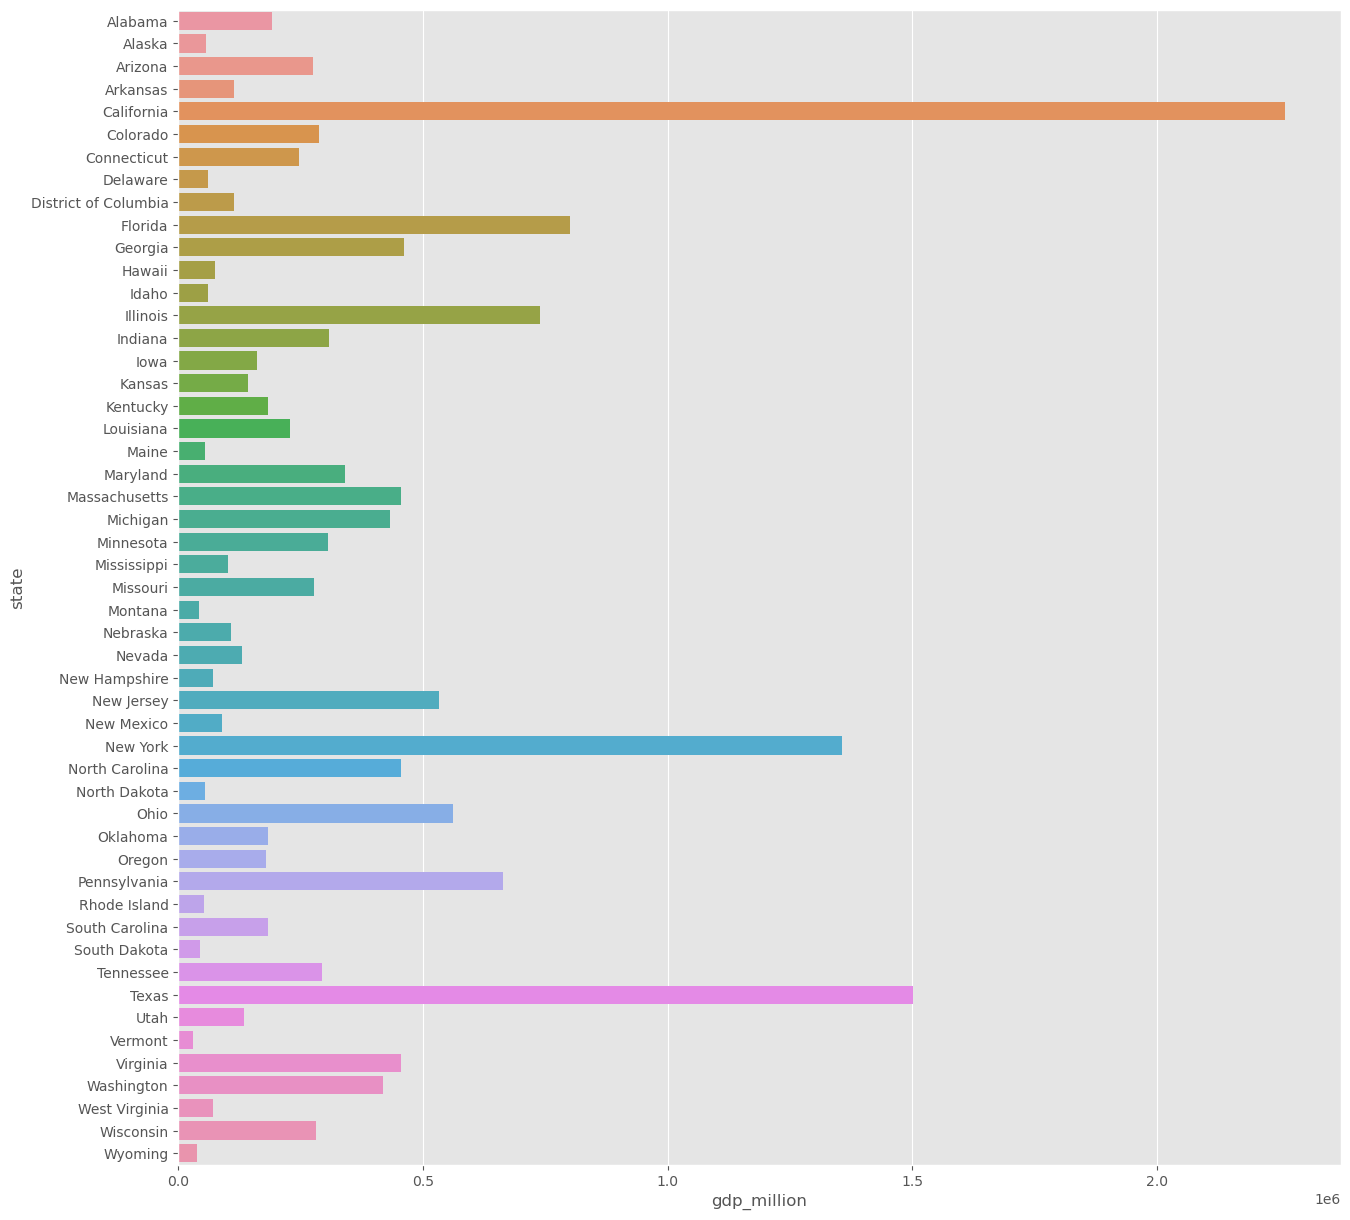

In [38]:
plt.figure(figsize=(15, 15))
sns.barplot(data = states_data , x = states_data['gdp_million'] , y = states_data['state'])

In [7]:
max_gdp_index = states_data['gdp_million'].idxmax()
state_max_gdp = states_data.loc[max_gdp_index, 'state']
print(state_max_gdp)

California


<Axes: xlabel='region', ylabel='count'>

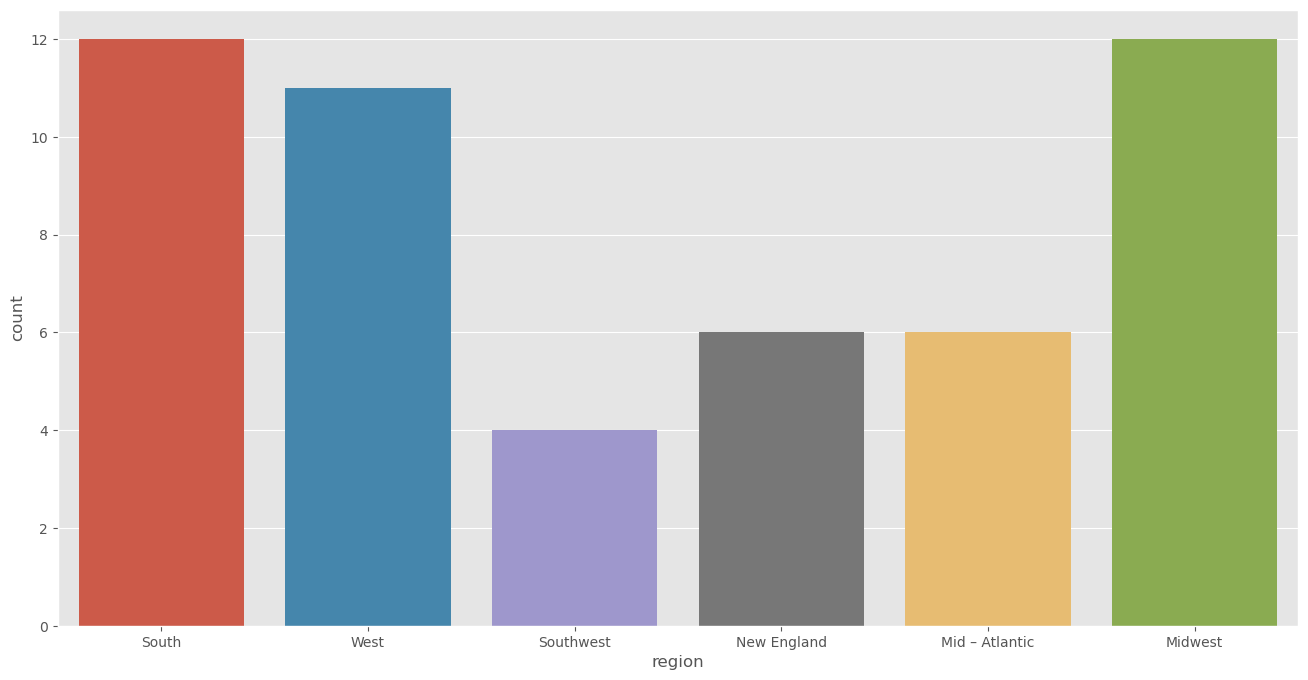

In [8]:
plt.figure(figsize=(16,8))
sns.countplot(data =region_data , x =region_data['region']) 

In [9]:
cal = region_data['region'].value_counts()
cal

region
South             12
Midwest           12
West              11
New England        6
Mid – Atlantic     6
Southwest          4
Name: count, dtype: int64

### Calculate Enrollment Rate

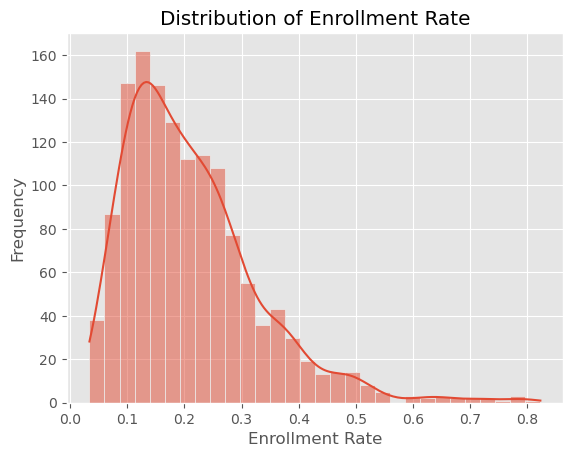

In [61]:
univer_data['Enrollment Rate'] = univer_data['Enrolled total'] / univer_data['Applicants total']
enrollment_rate_stats = univer_data['Enrollment Rate'].describe()
sns.histplot(univer_data['Enrollment Rate'].dropna(), bins=30, kde=True)
plt.title('Distribution of Enrollment Rate')
plt.xlabel('Enrollment Rate')
plt.ylabel('Frequency')
plt.show()

### Calculate Graduation Rates

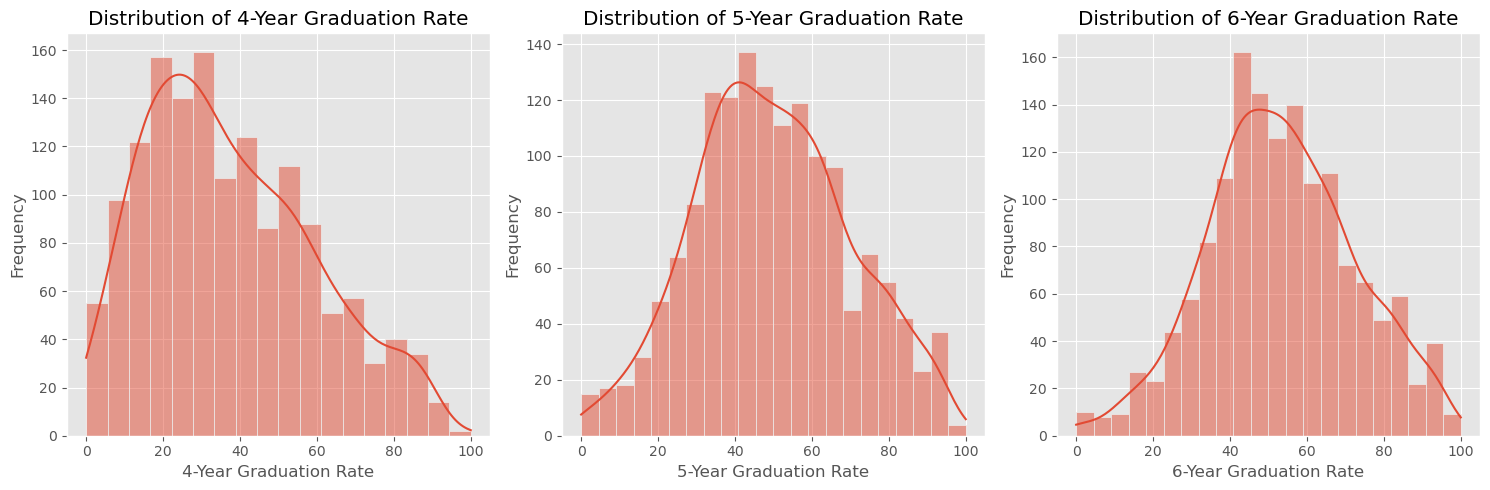

In [67]:
univer_data['Graduation Rate - 4 years'] = univer_data['Graduation rate - Bachelor degree within 4 years, total']
univer_data['Graduation Rate - 5 years'] = univer_data['Graduation rate - Bachelor degree within 5 years, total']
univer_data['Graduation Rate - 6 years'] = univer_data['Graduation rate - Bachelor degree within 6 years, total']

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(univer_data['Graduation Rate - 4 years'].dropna(), kde=True)
plt.title('Distribution of 4-Year Graduation Rate')
plt.xlabel('4-Year Graduation Rate')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(univer_data['Graduation Rate - 5 years'].dropna(), kde=True)
plt.title('Distribution of 5-Year Graduation Rate')
plt.xlabel('5-Year Graduation Rate')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(univer_data['Graduation Rate - 6 years'].dropna() ,  kde=True)
plt.title('Distribution of 6-Year Graduation Rate')
plt.xlabel('6-Year Graduation Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Scatter plot: Graduation Rate vs. Tuition and Fees

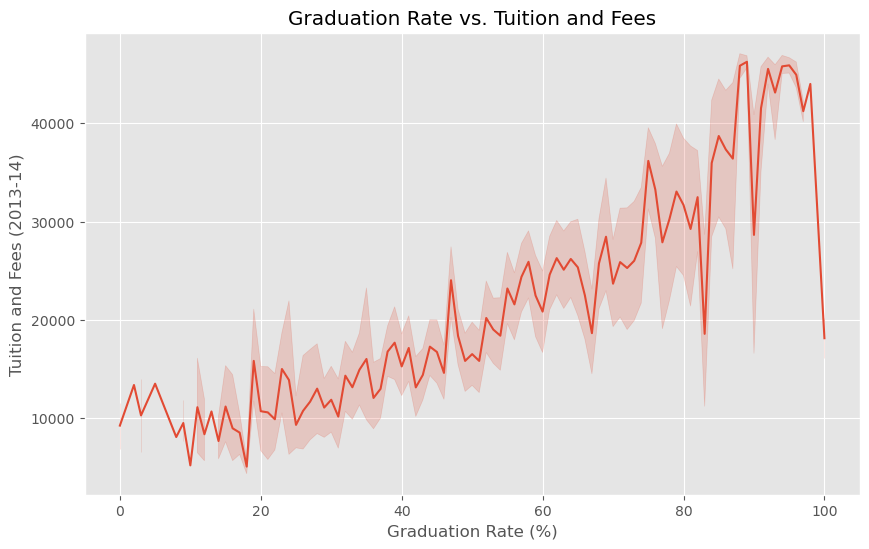

In [73]:
selected_columns = ['Name', 'Graduation rate - Bachelor degree within 6 years, total', 'Tuition and fees, 2013-14']
selected_data = univer_data[selected_columns].dropna()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Graduation rate - Bachelor degree within 6 years, total', y='Tuition and fees, 2013-14', data=selected_data)
plt.title('Graduation Rate vs. Tuition and Fees')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Tuition and Fees (2013-14)')
plt.show()

In [72]:
selected_columns = ['Name', 'Graduation rate - Bachelor degree within 6 years, total', 'Tuition and fees, 2013-14']
selected_data = univer_data[selected_columns].dropna()
selected_data['Cost per Student'] = selected_data['Tuition and fees, 2013-14'] / univer_data['Estimated enrollment, total']
selected_data['Lucrativeness Metric'] = selected_data['Graduation rate - Bachelor degree within 6 years, total'] - selected_data['Cost per Student']
sorted_data = selected_data.sort_values(by='Lucrativeness Metric', ascending=False)
top_lucrative_colleges = sorted_data.head(5)
print("Top 5 Most Lucrative Colleges:")
print(top_lucrative_colleges[['Name', 'Tuition and fees, 2013-14']])

Top 5 Most Lucrative Colleges:
                                    Name  Tuition and fees, 2013-14
544                   Harvard University                    42292.0
179                      Yale University                    44000.0
1140          University of Pennsylvania                    45890.0
1469                 Stanford University                    43683.0
1391  University of Virginia-Main Campus                    12668.0


<Axes: xlabel='Applicants total', ylabel='Enrolled total'>

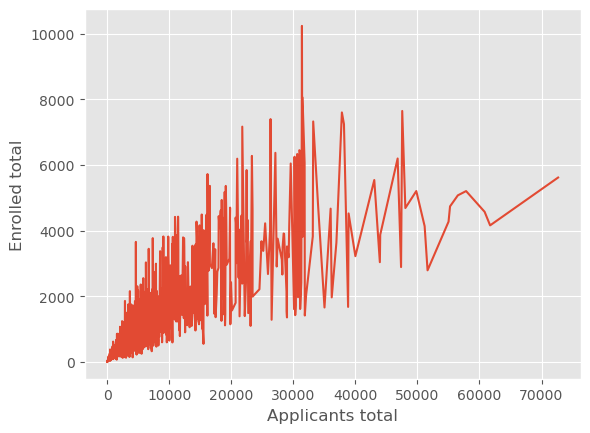

In [43]:
sns.lineplot(data=univer_data, x='Applicants total', y ='Enrolled total')

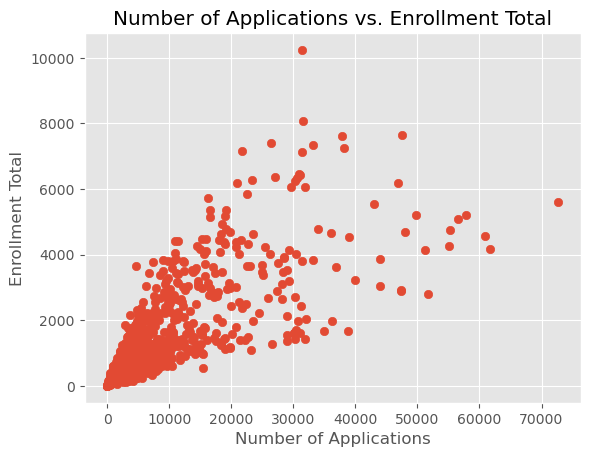

In [55]:
# Scatter plot: Number of applications vs. Enrollment total
plt.scatter(univer_data['Applicants total'], univer_data['Enrolled total'])
plt.title('Number of Applications vs. Enrollment Total')
plt.xlabel('Number of Applications')
plt.ylabel('Enrollment Total')
plt.show()

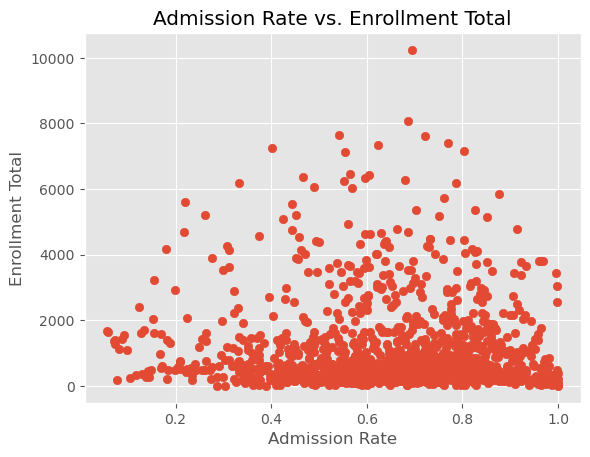

In [51]:
# Scatter plot: Admission rate vs. Enrollment total
admission_rate = univer_data['Admissions total'] / univer_data['Applicants total']
plt.scatter(admission_rate, univer_data['Enrolled total'])
plt.title('Admission Rate vs. Enrollment Total')
plt.xlabel('Admission Rate')
plt.ylabel('Enrollment Total')
plt.show()


In [83]:
grp = univer_data.groupby('State abbreviation')['County name'].value_counts()
grp 

State abbreviation  County name      
Alabama             Montgomery County    5
                    Jefferson County     4
                    Madison County       3
                    Mobile County        3
                    Tuscaloosa County    2
                                        ..
Wisconsin           Sheboygan County     1
                    Walworth County      1
                    Winnebago County     1
                    Ashland County       1
Wyoming             Albany County        1
Name: count, Length: 818, dtype: int64

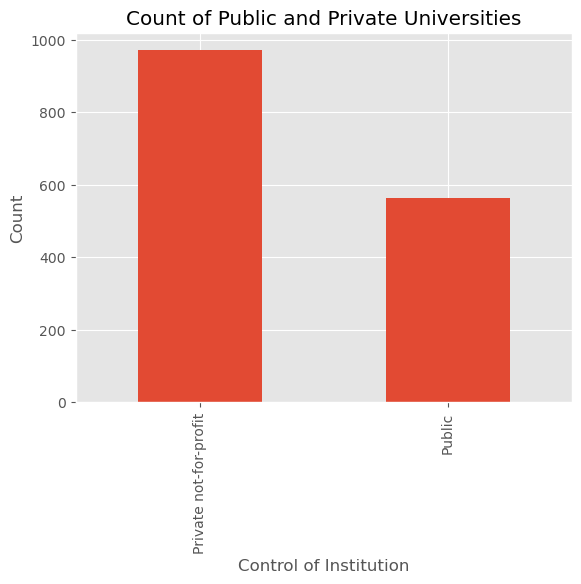

In [11]:
# Bar plot: Count of public and private universities
univer_data['Control of institution'].value_counts().plot(kind='bar')
plt.title('Count of Public and Private Universities')
plt.xlabel('Control of Institution')
plt.ylabel('Count')
plt.show()

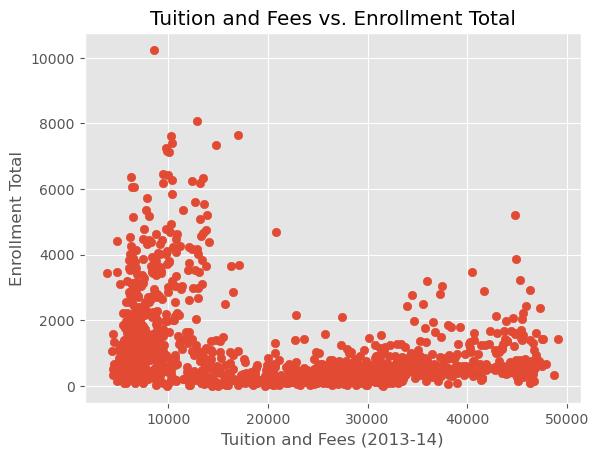

In [12]:
# Scatter plot: Tuition and fees vs. Enrollment total
plt.scatter(univer_data['Tuition and fees, 2013-14'], univer_data['Enrolled total'])
plt.title('Tuition and Fees vs. Enrollment Total')
plt.xlabel('Tuition and Fees (2013-14)')
plt.ylabel('Enrollment Total')
plt.show()

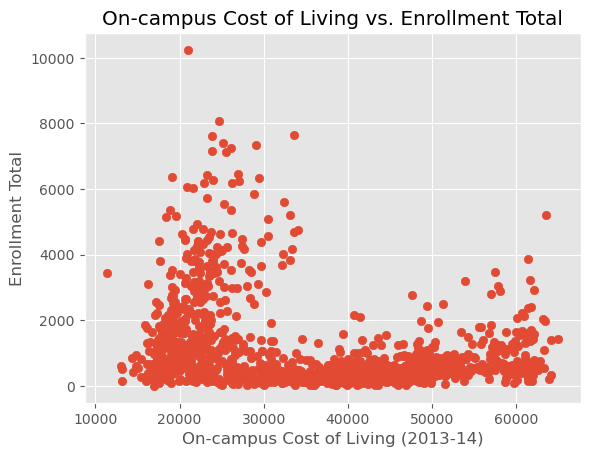

In [13]:
# Scatter plot: On-campus cost of living vs. Enrollment total
plt.scatter(univer_data['Total price for in-state students living on campus 2013-14'], univer_data['Enrolled total'])
plt.title('On-campus Cost of Living vs. Enrollment Total')
plt.xlabel('On-campus Cost of Living (2013-14)')
plt.ylabel('Enrollment Total')
plt.show()


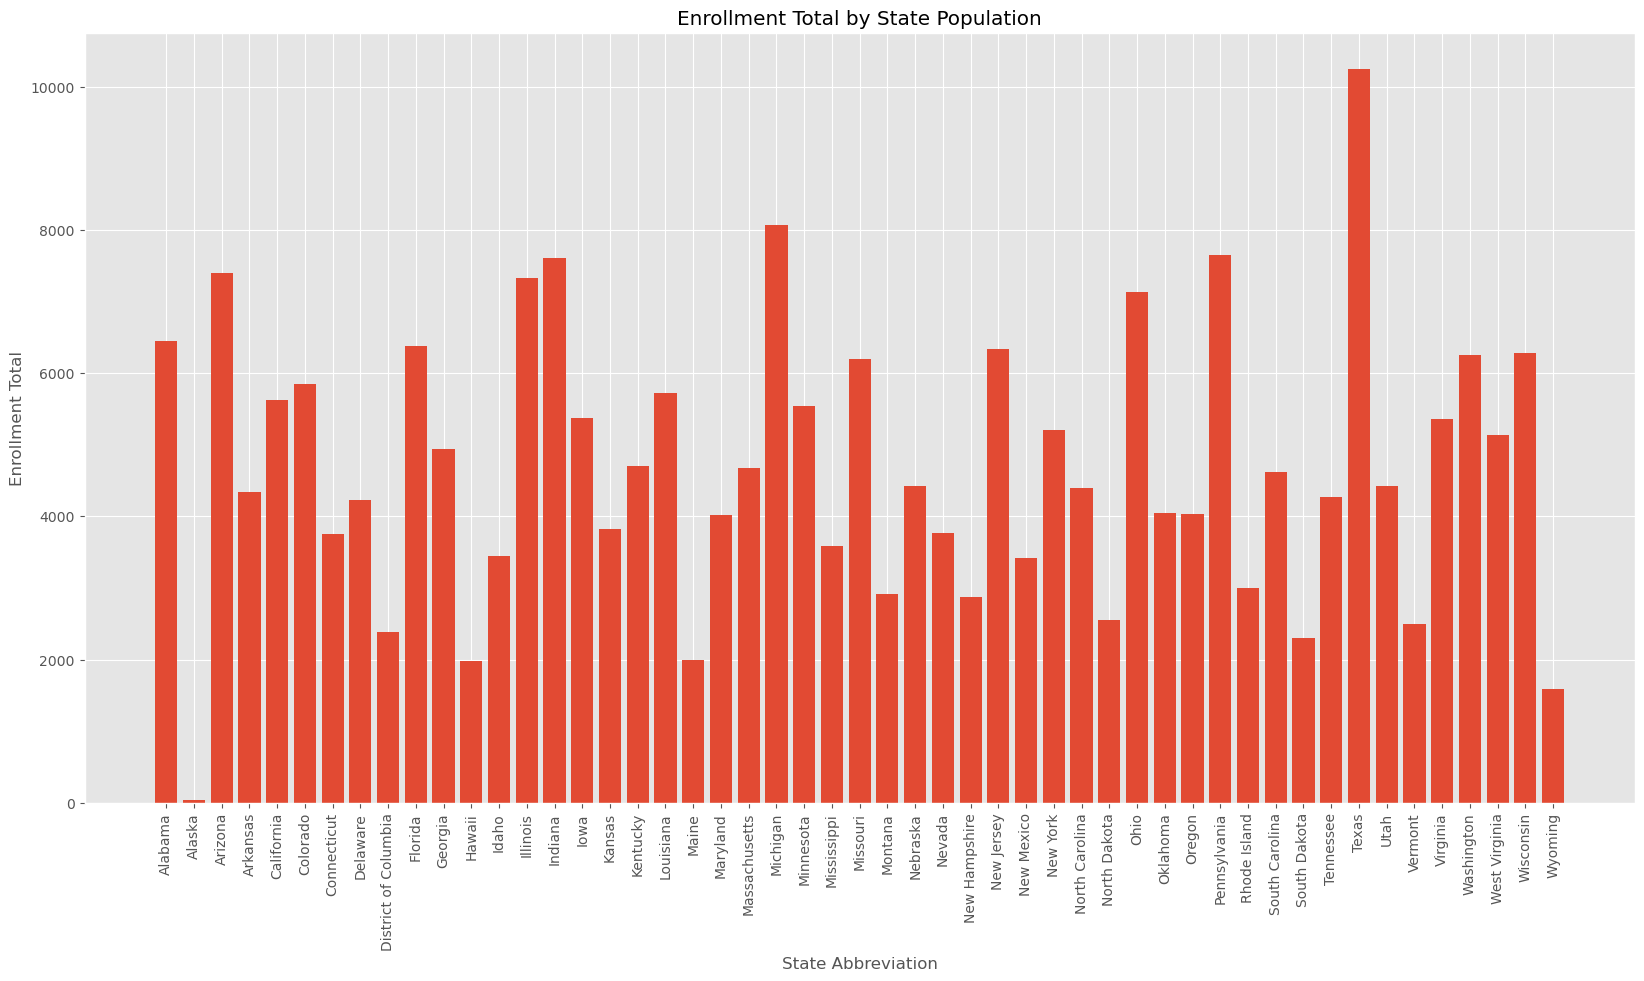

In [19]:
# Bar plot: Count of universities by state population
plt.figure(figsize=(20,10))
state_population = states_data.groupby('state')['gdp_million'].sum()
univer_data['State Population'] = univer_data['State abbreviation'].map(state_population)
plt.bar(univer_data['State abbreviation'] ,  univer_data['Enrolled total'])
plt.xticks(rotation = 90)
plt.title('Enrollment Total by State Population')
plt.xlabel('State Abbreviation')
plt.ylabel('Enrollment Total')
plt.show()


In [20]:
univer_data['State Population']

0        191481.0
1        191481.0
2        191481.0
3        191481.0
4        191481.0
          ...    
1529     800704.1
1530    1355581.4
1531     143220.7
1532    2262771.2
1533     800704.1
Name: State Population, Length: 1534, dtype: float64

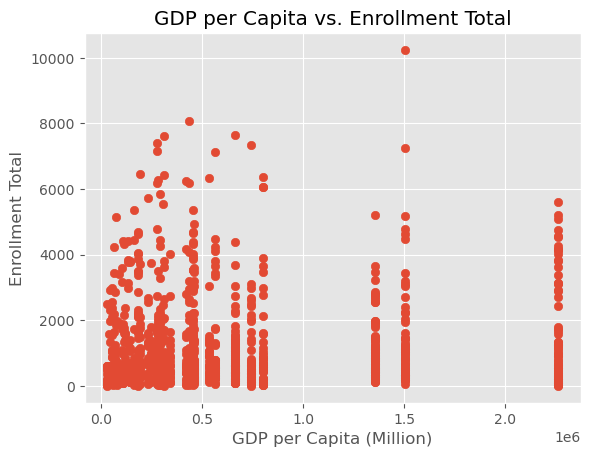

In [23]:
# Merge data to get GDP per capita for each university
merged_data = pd.merge(univer_data, states_data, left_on='State abbreviation', right_on='state', how='left')

# Scatter plot: GDP per capita vs. Enrollment total
plt.scatter(merged_data['gdp_million'], merged_data['Enrolled total'])
plt.title('GDP per Capita vs. Enrollment Total')
plt.xlabel('GDP per Capita (Million)')
plt.ylabel('Enrollment Total')
plt.show()


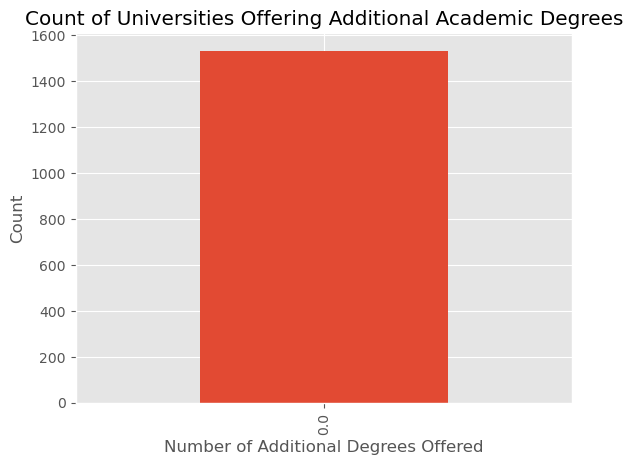

In [30]:
# Columns to convert to numeric
degree_cols = ['Offers Postbaccalaureate certificate', 'Offers Master\'s degree', 'Offers Doctor\'s degree - research/scholarship', 
               'Offers Doctor\'s degree - professional practice', 'Offers Doctor\'s degree - other', 'Offers Other degree']

# Convert columns to numeric, replacing non-numeric values with 0
univer_data[degree_cols] = univer_data[degree_cols].apply(pd.to_numeric)

# Bar plot: Count of universities offering additional academic degrees
univer_data['Additional Degrees'] = univer_data[degree_cols].sum(axis=1)
univer_data['Additional Degrees'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Universities Offering Additional Academic Degrees')
plt.xlabel('Number of Additional Degrees Offered')
plt.ylabel('Count')
plt.show()